In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://github.com/NREL/FieldCampaign
from FieldCampaign import database as fdb

# Compare north and south sodars
_Eliot Quon (eliot.quon@nrel.gov)_

Findings (based on analysis of 3 months of data):
- The offset between the south sodar and other instruments--by virtue of the _corrected_ north sodar signal--is approximately **-1$^\circ$**.
- This depends on the wind-direction offset (calculated by `sodar_lidar_met_correlation.ipynb`), which has inherent uncertainty; therefore, it is unclear whether a bias truly exists or not.

In [2]:
startdate = pd.to_datetime('2019-11-01')
enddate = pd.to_datetime('2020-01-31')

In [3]:
# consider northerly wind sector w/o terrain or turbine wake influence 
#comparison_dir_range = [300,359.9999]
comparison_dir_range = [314,344] # from north sodar to T5

In [4]:
# from `sodar_lidar_met_correlation.ipynb`
north_sodar_wdir_correction = -28.25901298

In [5]:
sodar_quality_cutoff = 90 # range: [0,100]

## get data from database and standardize

In [6]:
connect = fdb.Database()

INTIALIZE DATA BASE!!!
2019-11-15 00:00:00
2020-10-27 00:00:00
DATABASE INITIALIZED WITH START AND STOP TIME 2019-11-15 00:00:00 2020-10-27 00:00:00


In [7]:
%time df_hist = connect.get_data_from_db_1min(startdate,enddate)

# CPU times: user 40 s, sys: 13.8 s, total: 53.8 s
# Wall time: 2min 10s

CPU times: user 40.8 s, sys: 9.77 s, total: 50.5 s
Wall time: 1min 37s


In [8]:
df_hist['time'] = pd.to_datetime(df_hist['time'],format='%Y-%m-%d %H:%M:%S')
df_hist = df_hist.set_index('time')

In [9]:
north_wspd_cols = [col for col in df_hist.columns if col.startswith('sodar_') and col.endswith('_wind_speed') and not col.startswith('sodar_south')]
north_wdir_cols = [col for col in df_hist.columns if col.startswith('sodar_') and col.endswith('_wind_direction') and not col.startswith('sodar_south')]
north_qc_cols = [col for col in df_hist.columns if col.startswith('sodar_') and col.endswith('_quality') and not col.startswith('sodar_south')]

south_wspd_cols = [col for col in df_hist.columns if col.startswith('sodar_south_') and col.endswith('_wind_speed')]
south_wdir_cols = [col for col in df_hist.columns if col.startswith('sodar_south_') and col.endswith('_wind_direction')]
south_qc_cols = [col for col in df_hist.columns if col.startswith('sodar_south_') and col.endswith('_quality')]

In [10]:
sodar = {}

In [11]:
%%time
df = pd.DataFrame()
for wscol,wdcol,qccol in zip(north_wspd_cols,north_wdir_cols,north_qc_cols):
    print(wscol,wdcol,qccol)
    hgt = wscol.split('_')[1][:-1]
    assert hgt == wdcol.split('_')[1][:-1]
    assert hgt == qccol.split('_')[1][:-1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['wdir'] = df_hist[wdcol] + north_sodar_wdir_correction
    tmp.loc[tmp['wdir'] < 0, 'wdir'] += 360
    tmp.loc[tmp['wdir'] >= 360, 'wdir'] -= 360
    tmp['qc'] = df_hist[qccol]
    tmp['height'] = float(hgt)
    df = pd.concat([df,tmp])
df = df.set_index('height',append=True).sort_index()
df = df.unstack().resample('10min').first().stack(dropna=False)
sodar['north'] = df

sodar_30m_wind_speed sodar_30m_wind_direction sodar_30m_quality
sodar_40m_wind_speed sodar_40m_wind_direction sodar_40m_quality
sodar_50m_wind_speed sodar_50m_wind_direction sodar_50m_quality
sodar_60m_wind_speed sodar_60m_wind_direction sodar_60m_quality
sodar_80m_wind_speed sodar_80m_wind_direction sodar_80m_quality
sodar_100m_wind_speed sodar_100m_wind_direction sodar_100m_quality
sodar_120m_wind_speed sodar_120m_wind_direction sodar_120m_quality
sodar_140m_wind_speed sodar_140m_wind_direction sodar_140m_quality
sodar_160m_wind_speed sodar_160m_wind_direction sodar_160m_quality
sodar_180m_wind_speed sodar_180m_wind_direction sodar_180m_quality
sodar_200m_wind_speed sodar_200m_wind_direction sodar_200m_quality
CPU times: user 5.84 s, sys: 560 ms, total: 6.4 s
Wall time: 6.45 s


In [12]:
%%time
df = pd.DataFrame()
for wscol,wdcol,qccol in zip(south_wspd_cols,south_wdir_cols,south_qc_cols):
    print(wscol,wdcol,qccol)
    hgt = wscol.split('_')[2][:-1]
    assert hgt == wdcol.split('_')[2][:-1]
    assert hgt == qccol.split('_')[2][:-1]
    tmp = pd.DataFrame()
    tmp['wspd'] = df_hist[wscol]
    tmp['wdir'] = df_hist[wdcol]
    tmp['qc'] = df_hist[qccol]
    tmp['height'] = float(hgt)
    df = pd.concat([df,tmp])
df = df.set_index('height',append=True).sort_index()
df = df.unstack().resample('10min').first().stack(dropna=False)
sodar['south'] = df

sodar_south_30m_wind_speed sodar_south_30m_wind_direction sodar_south_30m_quality
sodar_south_40m_wind_speed sodar_south_40m_wind_direction sodar_south_40m_quality
sodar_south_50m_wind_speed sodar_south_50m_wind_direction sodar_south_50m_quality
sodar_south_60m_wind_speed sodar_south_60m_wind_direction sodar_south_60m_quality
sodar_south_80m_wind_speed sodar_south_80m_wind_direction sodar_south_80m_quality
sodar_south_100m_wind_speed sodar_south_100m_wind_direction sodar_south_100m_quality
sodar_south_120m_wind_speed sodar_south_120m_wind_direction sodar_south_120m_quality
sodar_south_140m_wind_speed sodar_south_140m_wind_direction sodar_south_140m_quality
sodar_south_160m_wind_speed sodar_south_160m_wind_direction sodar_south_160m_quality
sodar_south_180m_wind_speed sodar_south_180m_wind_direction sodar_south_180m_quality
sodar_south_200m_wind_speed sodar_south_200m_wind_direction sodar_south_200m_quality
CPU times: user 5.74 s, sys: 436 ms, total: 6.17 s
Wall time: 6.22 s


In [13]:
alltimes = sodar['north'].index.levels[0]

## filter by wdir, quality

In [14]:
for site,df in sodar.items():
    wdir = df['wdir']
    df = df.copy()
    df = df.loc[(wdir >= comparison_dir_range[0]) & (wdir <= comparison_dir_range[1])]
    df.loc[(df['qc'] < sodar_quality_cutoff), :] = np.nan
    df = df.unstack().reindex(alltimes).stack(dropna=False)
    sodar[site] = df

Text(0.5, 1.0, 'south')

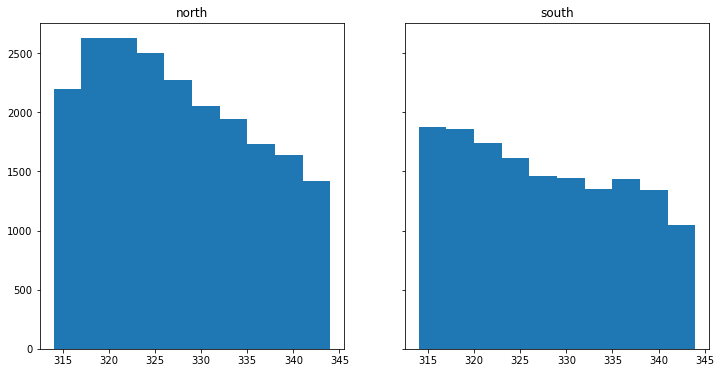

In [15]:
fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(12,6))
#bins = np.arange(0,361,15)
#ax[0].hist(sodar['north']['wdir'],bins=bins)
#ax[1].hist(sodar['south']['wdir'],bins=bins)
ax[0].hist(sodar['north']['wdir'])
ax[1].hist(sodar['south']['wdir'])
ax[0].set_title('north')
ax[1].set_title('south')
#ax[0].set_xticks(np.arange(bins[0],bins[-1]+1,45))

## make scatter plots

In [16]:
def scat(ax,qty,z):
    # collect data
    x = sodar['south'].xs(z,level='height')[qty]
    y = sodar['north'].xs(z,level='height')[qty]
    # scatterplot w/ ref line
    ax.scatter(x,y,alpha=0.1)
    xlim = ax.get_xlim()
    ax.plot(xlim,xlim,color=[0,1,0],lw=1)
    ax.set_xlim(xlim)
    ax.set_xlabel('south sodar',fontsize='x-large')
    #ax.set_ylabel('north sodar',fontsize='x-large')
    ax.set_title(f'z = {z:g} m',fontsize='x-large')
    ax.grid()
    ax.axis('scaled')

In [17]:
comparison_heights = [40,80,120]
Nheights = len(comparison_heights)

### wind speed

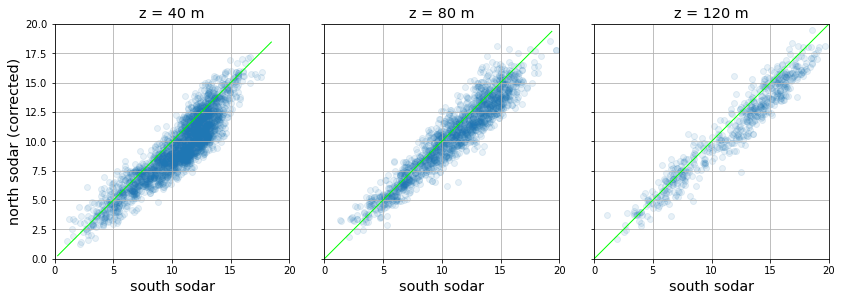

In [18]:
fig,ax = plt.subplots(ncols=Nheights,sharex=True,sharey=True,figsize=(Nheights*4,4))
for axi,hgt in zip(ax,comparison_heights):
    scat(axi,'wspd',hgt)
ax[0].set_ylabel('north sodar (corrected)',fontsize='x-large')
ax[0].set_xlim((0,20))
ax[1].set_ylim((0,20))
fig.tight_layout()

### wind direction

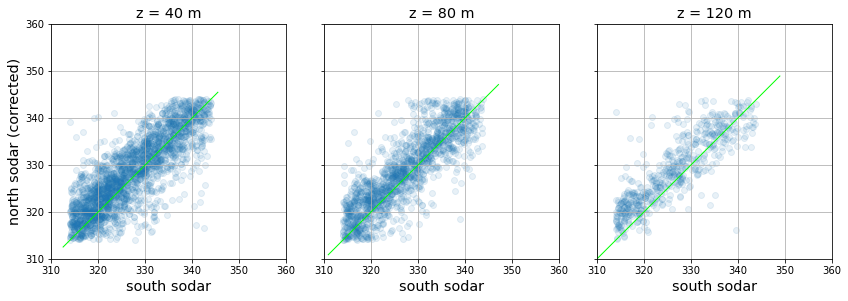

In [19]:
fig,ax = plt.subplots(ncols=Nheights,sharex=True,sharey=True,figsize=(Nheights*4,4))
for axi,hgt in zip(ax,comparison_heights):
    scat(axi,'wdir',hgt)
ax[0].set_ylabel('north sodar (corrected)',fontsize='x-large')
ax[0].set_xlim((310,360))
ax[1].set_ylim((310,360))
fig.tight_layout()

### estimate wind direction offset

In [20]:
def calc_fit_R2(x,y,slope=None):
    notna = ~(pd.isna(x) | pd.isna(y))
    x = x.loc[notna]
    y = y.loc[notna]
    if slope is None:
        coef = np.polyfit(x,y,1)
    else:
        offset = np.sum(y - slope*x) / len(x)
        coef = [slope,offset]
    p = np.poly1d(coef)
    yhat = p(x)
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    R2 = ssreg / sstot
    return coef, R2

In [21]:
z1 = 40.0
x = sodar['south'].xs(z1, level='height')['wdir']
y = sodar['north'].xs(z1, level='height')['wdir']
p,R2 = calc_fit_R2(x,y)
wdir_offset = p[1]
p, R2

(array([ 0.79890464, 67.01854473]), 0.6779051002185319)

In [22]:
# sanity check
calc_fit_R2(x,y,slope=p[0])

([0.798904642447686, 67.01854473468954], 0.6779051002185336)

In [23]:
# force slope==1
z1 = 40.0
x = sodar['south'].xs(z1, level='height')['wdir']
y = sodar['north'].xs(z1, level='height')['wdir']
p,R2 = calc_fit_R2(x,y,slope=1)
wdir_offset = p[1]
p, R2

([1, 1.2732890722144683], 1.0621332671492834)

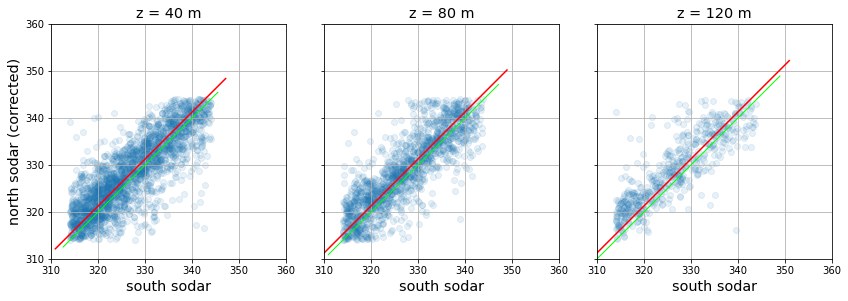

In [24]:
fig,ax = plt.subplots(ncols=Nheights,sharex=True,sharey=True,figsize=(Nheights*4,4))
for axi,hgt in zip(ax,comparison_heights):
    scat(axi,'wdir',hgt)
    xlim = axi.get_xlim()
    axi.plot(xlim, [xlim[0]+wdir_offset, xlim[1]+wdir_offset], 'r')
ax[0].set_ylabel('north sodar (corrected)',fontsize='x-large')
ax[0].set_xlim((310,360))
ax[1].set_ylim((310,360))
fig.tight_layout()